In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [74]:
data = pd.read_csv('./data/Mușat F. Andreea-Alexandra.csv')
data = data.drop(columns=['Unnamed: 0'])
authors = data.columns.tolist()
print('The authors in our dataset are: {}'.format(authors))
data.head()

The authors in our dataset are: ['Bret Harte', 'Frank Richard Stockton', 'William Dean Howells', 'Sir Walter Scott', 'Andrew Lang', 'Rudyard Kipling', 'Edmund Burke', 'Sir Arthur Conan Doyle', 'Joseph Conrad', 'John Galsworthy', 'Mark Twain', 'Edward Stratemeyer', 'Zane Grey', 'William Makepeace Thackeray', 'Robert Louis Stevenson', 'Thomas Carlyle', 'Charles Dickens', 'Jacob Abbott', 'Edward Phillips Oppenheim', 'Herbert George Wells']


,Bret Harte,Frank Richard Stockton,William Dean Howells,Sir Walter Scott,Andrew Lang,Rudyard Kipling,Edmund Burke,Sir Arthur Conan Doyle,Joseph Conrad,John Galsworthy,Mark Twain,Edward Stratemeyer,Zane Grey,William Makepeace Thackeray,Robert Louis Stevenson,Thomas Carlyle,Charles Dickens,Jacob Abbott,Edward Phillips Oppenheim,Herbert George Wells
0,to the uneasiness of both parties--and contras...,"house for water, for I can never drink that st...",grim bird that looks our way?-- Yon silent...,"the King, smiling; ""and didst thou know an anc...","caught Prince Ivan, chopped him into little pi...","lost her temper with the children, she abused ...","guilt, and which will show the mischievous con...",foraging parties which had never returned. Th...,"all black in the pale wall, stood open as he h...",again. I don't want---- He breaks off a...,of people; but he didn't sit up nights to hate...,the action of the administration. ...,"however, rode beside Joan. Once, at an opportu...","ladies, we do believe their information not to...",IV. PICTURE-BOOKS IN WINTER ...,EARLY KINGS OF NORWAY. by Thomas Carlyle T...,"at the last moment, used to come running forth...",The Rollo Books by Jacob Abbott [Illustra...,"grimly. ""Got you into a kind of hornets' nest...","his trusteeship to ask after my aunt Susan. ""..."
1,"came here. That's all! It isn't much, Tom. You...",the pearl-oysters. When he can stay down no lo...,to see how he took this; he must have felt it ...,"Kirklands in Roxburghshire, which he had purch...",are now arranged in a designed order. During ...,way. _Time_: The edge of sunset. Single room i...,"distracted, must at length obtain a decided su...","her,"" said Captain Ephraim. ""There is no othe...",induced me to look over my shoulder. I can't t...,"you a pink cream, Mr. Soames, like in old days...","acquiring sudden wealth was to ""salt"" a wild c...",ear. It was the last straw. With no fresh air...,"voice. ""Yes. What's wanted?"" answered Lane. ...",saw a young gazelle to glad me with its dark b...,"school-keeping,"" he writes, ""and found that my...","somewhat;--and so (as the Abbe Georgel, in wor...","of the conspiracies it brought to light, by se...",which were ordered to follow pretty closely be...,"she said quietly, ""you care--whether I am happ...","a commerce in superficialities, and each provi..."
2,"as that Mixer; and Nibbles, who borrowed money...","""She's been gone more 'n half an hour. She don...",do so; for any elephant that was deceived that...,"the assertion, that a king might take a lesson...",did he see the princess than he fell in love w...,"twisted into knots, riven with rents and diamo...",rather than to the jury as matter of popular j...,them to the light as he did so. He was clearly...,Westport was on the old pier to see the men ou...,livened and whitened by the moonlight--an embo...,solacing poesy in the PUBLIC LEDGER. In that c...,"""Then let us get breakfast and start."" Both o...","extended his hand to Joe. ""I wanted to be sure...",a large picture might have been painted out of...,in the days when she followed the 106th of the...,"rather likes his dinner, this Prince Karl, I a...","invisible. She is now in a madhouse, and, I fe...","which, at the period when they first emerge in...","you, wouldn't it?"" Philip remarked. ""Five hun...",EXPERIMENTS; OF GRAND MONARCHY ...
3,"me out, and shoot me under that name, without ...","then, the ship might sink all of a suddint, be...",undue burden she seems to throw upon the indiv...,"all my courage to reply. 'Yet my spirits, as ...","muscular action, also unconscious. This moves...","Sahib with his own hands, the shop fascinated ...","sufficient. X. I further assert, that even u...","troops all round him, like a great spider's we...",slaves of this infernal surprise which has bee...,"her effect, she broke off suddenly, and hastil...","up and quit. ""What does Isaac do now? He step...","think we ought to pay for it, anyway,"" answere...",To The Last Man b

In [76]:
from utils import embed_documents
from utils import split_data

corpus = data.values
texts_per_author, num_authors = corpus.shape

print(corpus[0][0][:40])
print(corpus[1][0][:40])

X, y, num_train_data = split_data(corpus, authors, test_split=0.25)

to the uneasiness of both parties--and c
came here. That's all! It isn't much, To


# Task 1. Text classification using SVM

In [2]:
from sklearn import svm
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from utils import update_best_model
from sklearn.metrics import accuracy_score

In [63]:
feats = embed_documents(X, 1024, 'tf-idf', 1, 1.0)
svm_model = svm.SVC(kernel='linear', gamma=1e-5, C=100)
svm_model.fit(feats[:num_train_data], y[:num_train_data])
pred_labels = svm_model.predict(feats[num_train_data:])
print('Accuracy: %.2f' % accuracy_score(y[num_train_data:], pred_labels))

Accuracy: 1.00


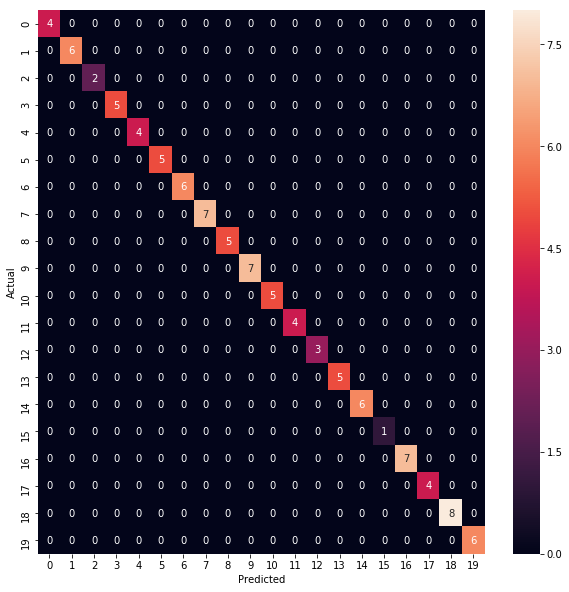

In [64]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_mat = confusion_matrix(y[num_train_data:], pred_labels)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

Now let's pretend we haven't seen the model above and let's do a grid search to find the best parameters.

In [27]:
best_model = {}
for embed_type in ['tf', 'tf-idf']:
    for embed_size in [512, 1024, 2048]:
        for min_df in [0.1, 0.2]:
            for max_df in [0.35, 0.45]:
                feats = embed_documents(X, embed_size, embed_type, min_df, max_df)
                C_range = np.logspace(-2, 10, 13)
                gamma_range = np.logspace(-9, 3, 13)
                param_grid = dict(gamma=gamma_range, C=C_range)
                cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
                grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
                grid.fit(feats, y)

                print('For embed type = {}, embed size = {}, min df = {}, max df = {}, the best'
                      ' parameters are: {} with a score of {}'.format(
                        embed_type, embed_size, min_df, max_df, grid.best_params_, grid.best_score_))
                
                if len(best_model) == 0 or grid.best_score_ > best_model['score']:
                    best_model = update_best_model(embed_type, embed_size, min_df, 
                                                   max_df, grid.best_params_, grid.best_score_)
                    

For embed type = tf, embed size = 512, min df = 0.1, max df = 0.35, the best parameters are: {'gamma': 1e-06, 'C': 100.0} with a score of 0.772
For embed type = tf, embed size = 512, min df = 0.1, max df = 0.45, the best parameters are: {'gamma': 1e-08, 'C': 10000.0} with a score of 0.804
For embed type = tf, embed size = 512, min df = 0.2, max df = 0.35, the best parameters are: {'gamma': 1e-06, 'C': 100.0} with a score of 0.794
For embed type = tf, embed size = 512, min df = 0.2, max df = 0.45, the best parameters are: {'gamma': 1e-06, 'C': 100.0} with a score of 0.814
For embed type = tf, embed size = 1024, min df = 0.1, max df = 0.35, the best parameters are: {'gamma': 1e-06, 'C': 100.0} with a score of 0.81
For embed type = tf, embed size = 1024, min df = 0.1, max df = 0.45, the best parameters are: {'gamma': 1e-06, 'C': 100.0} with a score of 0.844
For embed type = tf, embed size = 1024, min df = 0.2, max df = 0.35, the best parameters are: {'gamma': 1e-06, 'C': 100.0} with a sco

In [28]:
print(best_model)

{'embed_type': 'tf', 'max_df': 0.35, 'score': 0.898, 'C': 100.0, 'gamma': 1e-06, 'embed_size': 2048, 'min_df': 0.2}


Using the embedding features which yielded the best results in the grid search above, we experiment with PCA dimensionality reduction to see whether reducing the features space has any effect on the performance of the model.

In [3]:
from sklearn.decomposition import PCA

In [6]:
best_model = {'embed_type': 'tf', 'max_df': 0.35, 'score': 0.898, 
              'C': 100.0, 'gamma': 1e-06, 'embed_size': 2048, 'min_df': 0.2}

best_feats = embed_documents(X, best_model['embed_size'], best_model['embed_type'],\
                             best_model['min_df'], best_model['max_df'])

In [7]:
best_reduced_model = None
best_reduced_score = 0
for num_components in [100, 200, 250]:
    pca = PCA(n_components=num_components)
    reduced_feats = pca.fit_transform(best_feats.toarray())
    C_range = np.logspace(-2, 10, 10)
    gamma_range = np.logspace(-9, 3, 10)
    param_grid = dict(gamma=gamma_range, C=C_range)
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
    grid.fit(reduced_feats, y)

    print('For num_components = {}, score is {}'.format(num_components, grid.best_score_))
    
    if best_reduced_model is None or grid.best_score_ > best_reduced_score:
        best_reduced_model = grid.best_estimator_
        best_reduced_score = grid.best_score_

For num_components = 100, score is 0.83
For num_components = 200, score is 0.848
For num_components = 250, score is 0.86


As we can notice, reducing the space to 250 instead of 2048 (which was the embedding size for the best model when PCA was not used), the results are approximately the same (0.898 score)

Although not very informative (as the accuracy of a SVM classifier trained on data reduced to only 2 dimensions is too low), we can plot the decision boundary of the SVM:

In [18]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = plt.contourf(xx, yy, Z, **params)
    return out

pca = PCA(n_components=2)
reduced_feats = pca.fit_transform(best_feats.toarray())
C_range = np.logspace(2, 3, 2)
gamma_range = np.logspace(-6, -5, 2)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
grid = GridSearchCV(svm.SVC(), param_grid=param_grid, cv=cv)
grid.fit(reduced_feats, y)
best_2d_model = grid.best_estimator_

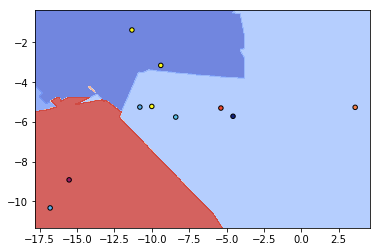

In [19]:
X0, X1 = reduced_feats[:10, 0], reduced_feats[:10, 1]
xx, yy = make_meshgrid(X0, X1)

author_colors = {author_idx : np.random.rand(3,) for author_idx in range(len(authors))}
colors = [author_colors[author_idx] for author_idx in y]

plot_contours(best_2d_model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X0, X1, c=colors, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [37]:
print(reduced_feats.shape)

(400, 2)


# Task 2. Text clustering

## K-Means

In [77]:
from sklearn.cluster import KMeans
from utils import plot_clusters

best_feats = embed_documents(X, 1024, 'tf-idf', 1, 1.0)

In [66]:
for n_clusters in range(18, 23):
    for init in ['random', 'k-means++']:
        kmeans = KMeans(n_clusters=n_clusters, init=init)
        predicted = kmeans.fit_predict(best_feats.toarray())
        print('--------------------------------------------------------')
        print('K-Means with {} clusters and {} init yields the clusters '
              '(each text is represented by its real author index) :'.format(n_clusters, init))
        
        special_authors = []
        for i in range(len(authors)):
            crt_pred = y[predicted == i]
            print('Cluster {} : {}'.format(i, crt_pred))
            if len(crt_pred) == 0: continue
            majority_label_count = np.bincount(crt_pred).max()
            if majority_label_count > 0.5 * texts_per_author and 1.0 * majority_label_count / len(crt_pred) > 0.5:
                majority_label = np.bincount(crt_pred).argmax()
                special_authors.append(authors[majority_label])
                
        print('Special authors (the ones who had their works clustered together '
               'so that they represent more than half of one cluster): {}'.format(set(special_authors)))

--------------------------------------------------------
K-Means with 18 clusters and random init yields the clusters (each text is represented by its real author index) :
Cluster 0 : [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12]
Cluster 1 : [ 2  9  1 19 19  1  1  2  9  9  2  1  1  2  9  2  2  1  1 11 19  1  9  1
  1  2 10 11 10 10 10 10  1  2  1  5  9  1  1  1  1 10  1  2]
Cluster 2 : [16  6 17 17  6  7 17 17  6  6 17  6 17  6 17 17 19  6  6  6 17  6  6]
Cluster 3 : [3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Cluster 4 : [5 5 5 5]
Cluster 5 : [15 15 15 15 15 15 15 15 15 15 15 15 15 15 15]
Cluster 6 : [ 4  7  5 14  5 14  5  5  5  4 11 18  3 14  5  7  1 14  4  1  7 14  7  7
  5  4  4  7  5  5  7  4  7 14  4  7  4  5  7  5  7  4  4 14  7  5  7  5]
Cluster 7 : [10 12 10]
Cluster 8 : [17  2 14 10 10  2  2 10  2 10 10 10 10  2  2 14 10 14  2 10  2  2 10 14
  2 14 10 10 16  1]
Cluster 9 : [11 11 11 11 11 11 11 11]
Cluster 10 : [11 11 11 11 11 11 11 11 11]
Cluster 11 : [15  2 15 15 15  5]
Cluster 12 : [

We notice that the clusters have different numbers of elements, but overall they seem to capture the style of one author. Also, although we print the names of 'special authors' (by special, we mean authors whose work - more than half of it - was clustered toghether and represented more than half of that cluster). Using the appropriate number of clusters, at least 10 authors are identified.

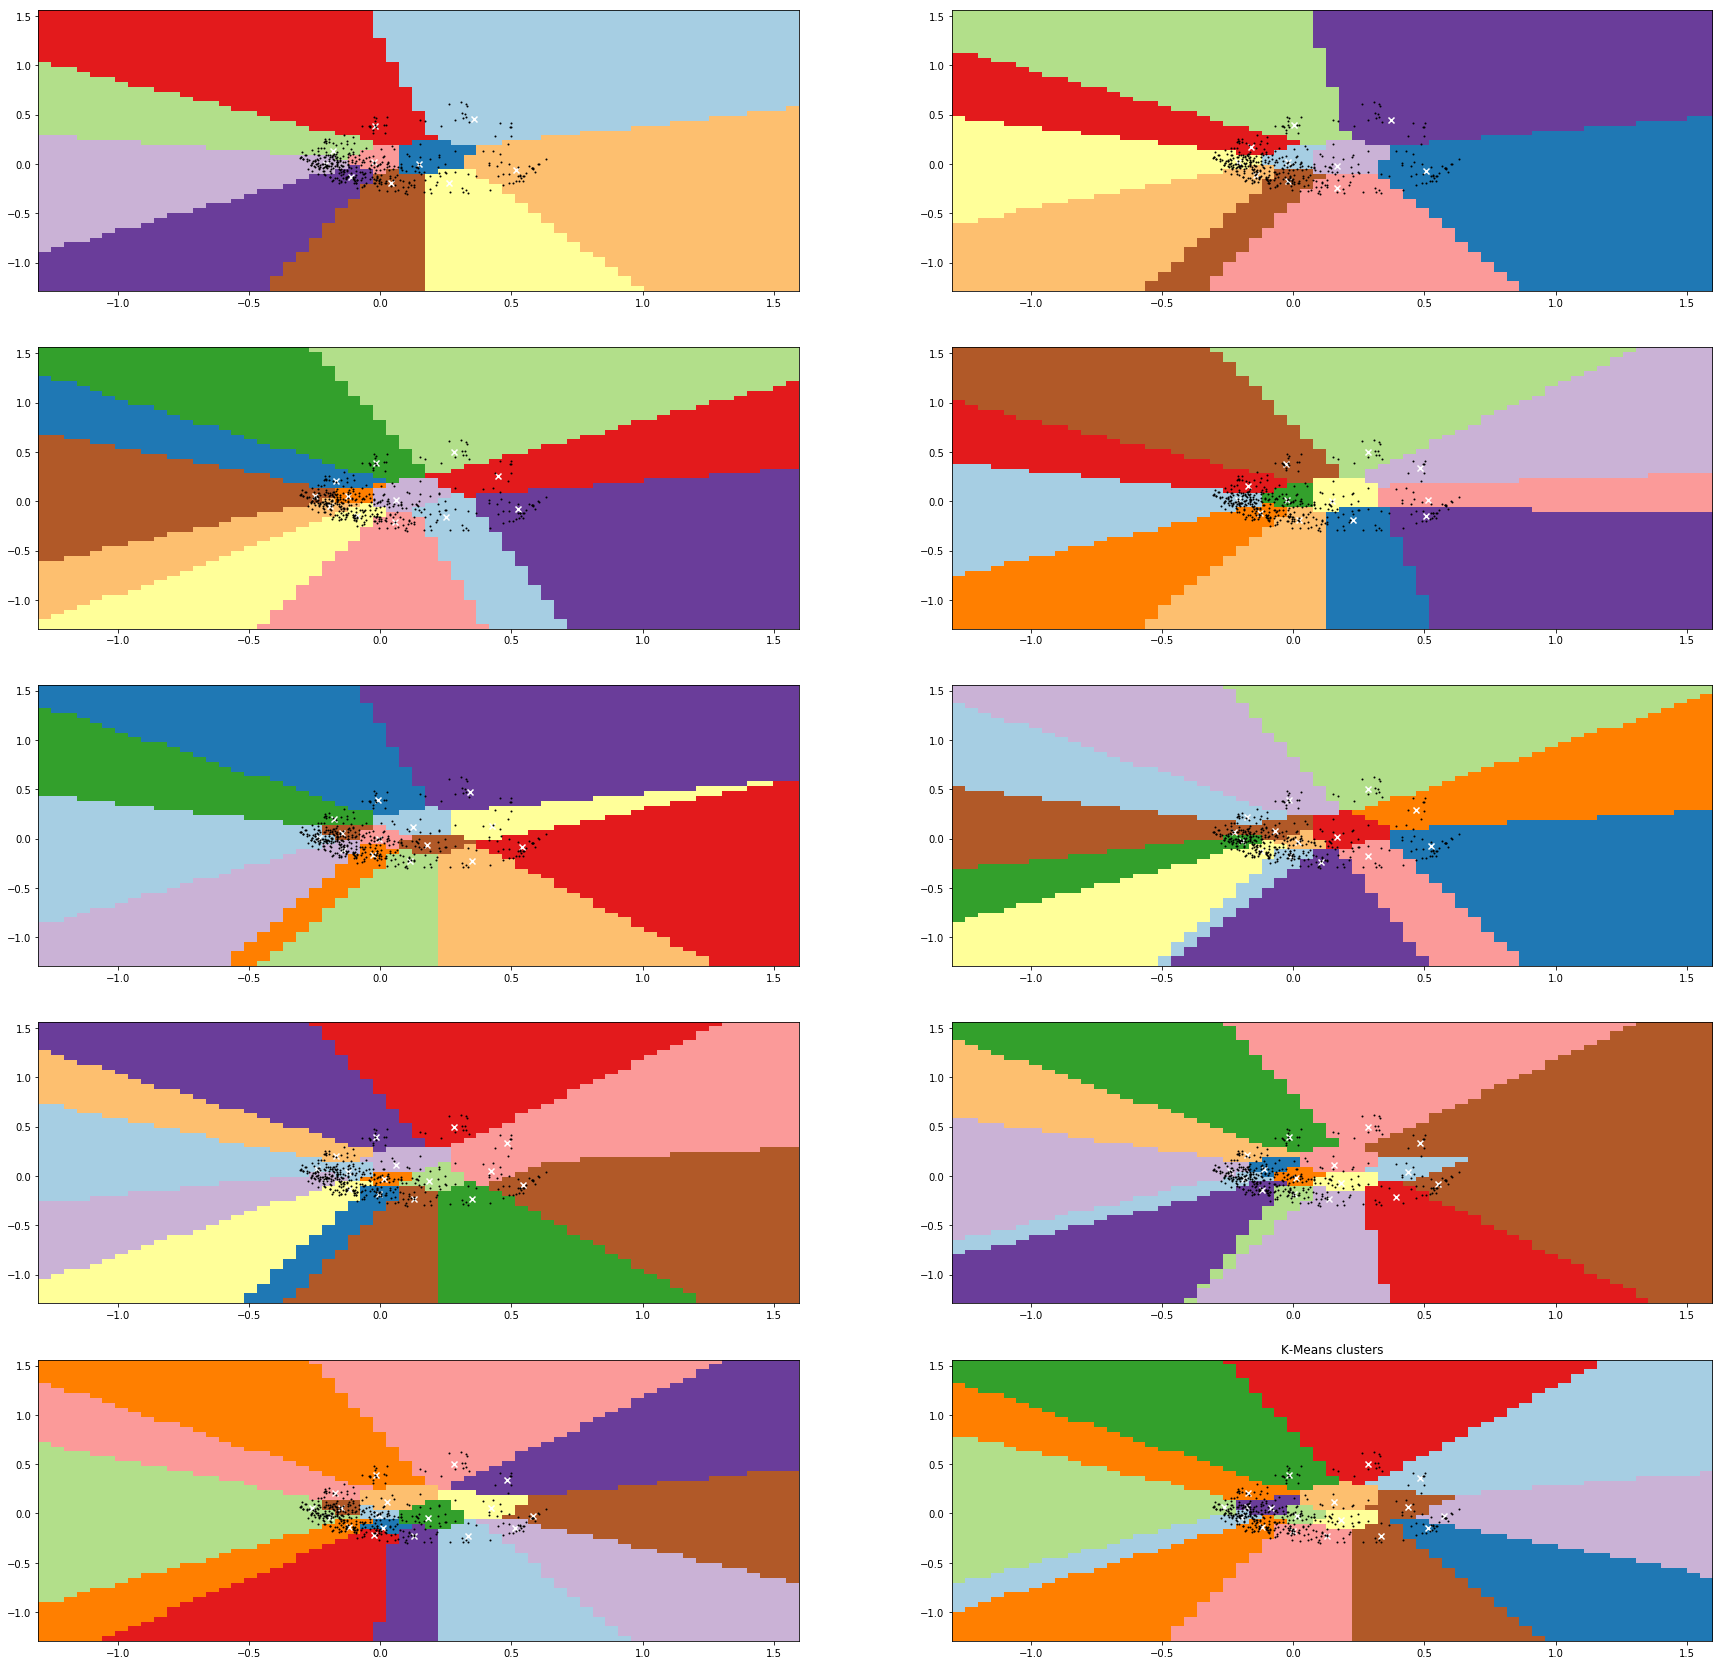

In [67]:
reduced_data = PCA(n_components=2).fit_transform(best_feats.toarray())
fig, ax = plt.subplots(5, 2, figsize=(30, 30))

i = 0
for n_clusters in range(10, 20, 2):
    j = 0
    for init in ['random', 'k-means++']:
        kmeans = KMeans(n_clusters=n_clusters, init=init)
        kmeans.fit(PCA(n_components=2).fit_transform(best_feats.toarray()))
        plot_clusters(reduced_data, kmeans, ax[i][j])
        j += 1
    i += 1

plt.title('K-Means clusters')
plt.show()

Surprisingly, the clusters seem to be quite balanced and well separated even though we reduced the dimensionality of the input features to only 2.

## DBSCAN

In [18]:
from sklearn.cluster import DBSCAN

i = 0
for eps in np.linspace(0.1, 0.3, 5):
    j = 0
    for min_samples in range(10, 18, 2):
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        predicted = dbscan.fit(PCA(n_components=5).fit_transform(best_feats.toarray())).labels_
        
        print('--------------------------------------------------------')
        print('DBSCAN with eps={} and min_samples={} yields the clusters '
              '(each text is represented by its real author index) :'.format(eps, min_samples))
        
        print(predicted)
        
        special_authors = []
        for i in range(len(authors)):
            crt_pred = y[predicted == i]
            print('Cluster {} : {}'.format(i, crt_pred))
            if len(crt_pred) == 0: continue
            majority_label_count = np.bincount(crt_pred).max()
            if 1.0 * majority_label_count / len(crt_pred) > 0.5:
                majority_label = np.bincount(crt_pred).argmax()
                special_authors.append(authors[majority_label])
                
        print('Special authors (the ones who had their works clustered together '
               'so that they represent more than half of one cluster): {}'.format(set(special_authors)))
        
        j += 1
    i += 1

--------------------------------------------------------
DBSCAN with eps=0.1 and min_samples=10 yields the clusters (each text is represented by its real author index) :
[-1 -1 -1 -1  1  0 -1 -1 -1 -1 -1  0 -1 -1  0 -1  0 -1 -1 -1 -1  1  1 -1
  0 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1  1 -1 -1  0 -1 -1
  0 -1 -1 -1 -1 -1  0 -1  0  1  0 -1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1  0 -1 -1 -1 -1  1 -1 -1 -1  0  0 -1 -1 -1 -1  0  0 -1 -1 -1 -1  0
 -1 -1  0 -1 -1  1 -1  0 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0  1 -1 -1
 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0 -1
 -1 -1 -1 -1 -1 -1  0 -1 -1 -1 -1 -1 -1  0  0 -1 -1  0 -1  0 -1 -1  0  0
  0 -1 -1 -1 -1 -1 -1 -1 -1  0 -1 -1  0 -1 -1  0  1 -1  1 -1 -1 -1 -1 -1
 -1 -1 -1 -1  1 -1 -1  0 -1  0 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1 -1
  0 -1 -1 -1  1 -1  0 -1  0 -1 -1 -1  0  0 -1 -1  0  0 -1  1 -1 -1  0  1
 -1 -1 -1 -1  1 -1 -1 -1  0  1 -1 -1  0 -1 -1 -1 -1 -1  1 -1 -1  0 -1 -1
  0 -1 -1  0 -1  1  0  1 -1

Most of the data forms a single cluster, while the rest of the data is considered noise (predicted values of '-1'). There are some parameters settings, however, that make the model able to identify a few authors very well: 'Edmund Burke', 'Thomas Carlyle', 'Sir Walter Scott', 'Edward Stratemeyer'. 'Thomas Carlyle' seems to be especially easy to identify, as several models can cluster his works together, even if they cannot tell the others apart.

## Hierarchical clustering

In [21]:
from sklearn.cluster import AgglomerativeClustering

for linkage in ['ward', 'complete', 'average']:
    for n_clusters in range(15, 23):
        predicted = AgglomerativeClustering(linkage=linkage, n_clusters=n_clusters).fit(
            PCA(n_components=100).fit_transform(best_feats.toarray())).labels_
        
        print('--------------------------------------------------------')
        print('Agglomerative clustering with linkage={} and n_clusters={} yields the clusters '
              '(each text is represented by its real author index) :'.format(linkage, n_clusters))
        
        special_authors = []
        for i in range(len(authors)):
            crt_pred = y[predicted == i]
            print('Cluster {} : {}'.format(i, crt_pred))
            if len(crt_pred) == 0: continue
            majority_label_count = np.bincount(crt_pred).max()
            if majority_label_count > 0.5 * texts_per_author and 1.0 * majority_label_count / len(crt_pred) > 0.5:
                majority_label = np.bincount(crt_pred).argmax()
                special_authors.append(authors[majority_label])
                
        print('Special authors (the ones who had their works clustered together '
               'so that they represent more than half of one cluster): {}'.format(set(special_authors)))
        

--------------------------------------------------------
Agglomerative clustering with linkage=ward and n_clusters=15 yields the clusters (each text is represented by its real author index) :
Cluster 0 : [ 2  1  9  8 10  0  1  0  1  8  1  1  0  0 10  9  9  9  9  1  1 10  2 11
 11  0  2  7 11  1  1  1  0  0  9  0  2 19  1  9  8 10  9  1  9  9  0 10
  8  1  1  8  0  2  0  0  1  9  8  9 11 19 10  0  8  1  8  9 10  9  0 19
  9  1  9  0  0  8  0  8  0  2  1 18  9  8  8 11  9  8  0 11  2  2  8  9
  1  8  8  9  0  8 19]
Cluster 1 : [16 13 19 16 19 19 18 16 19 18 18  4 18 18 18 14 18 18 18 16 18 16 16 18
 18 16 18 18 16 18 18 16 16 18 16 18 16 18]
Cluster 2 : [13 13  4  4 13 13 13 13 13 13 13  4  4 13 13 13  3  4 13 13  4 13 13  4
 13 13  4  4  4  1  4]
Cluster 3 : [12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12]
Cluster 4 : [ 7  5  5  5  3  5  4 16  7 14 16 16  5  7  4  3  7  5  7  7  5  5  7  4
  7  7  7  7  3  5  7  4  5  8 16  5 14 14  7  3 16 14 14 14  5  5  7  7
  5 16  5  4  5

Similar to K-Means, the best Agglomerative clustering models are able to tell apart really well about half of the authors.

## Bonus 1 - Classifing text using RandomForestClassifier and TfIdf features

In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

classifier = RandomForestClassifier(n_estimators=1000, random_state=0)  
classifier.fit(best_feats[:num_train_data], y[:num_train_data])  
predicted = classifier.predict(best_feats[num_train_data:])
acc = accuracy_score(y[num_train_data:], predicted)
print('Accuracy: {}'.format(acc))

Accuracy: 1.0


## Bonus 2 - clustering dogs

In [34]:
data = pd.read_csv('./data/Mușat_F_Andreea_Alexandra_train.csv')

# fill in missing values
indices = data[data['Height(cm)'].isnull()].index.values
data.at[indices, 'Height(cm)'] = data[data['Height(cm)'].notnull()]['Height(cm)'].mean()

for column_name in data.columns:
    if data[column_name].dtype == object:
        replace_map = {}
        unique_vals = data[column_name].unique()
        for i in range(len(unique_vals)):
            replace_map[unique_vals[i]] = i
        data[column_name] = data[column_name].map(replace_map)

    elif data[column_name].dtype == np.float64:
        data[column_name] = (data[column_name] - data[column_name].min()) / \
                    (data[column_name].max() - data[column_name].min())



data.sample(3)

,Breed Name,Weight(g),Height(cm),Longevity(yrs),Energy level,Attention Needs,Coat Lenght,Sex,Owner Name
158,3,0.069226,0.223799,0.548762,0,0,1,1,131
76,1,0.172440,0.767763,0.537185,1,0,1,1,71
147,1,0.198043,0.639009,0.639469,1,0,0,0,121


In [72]:
from sklearn import preprocessing

y = data['Breed Name'].values
X = data.drop(columns=['Breed Name', 'Owner Name', 'Sex', 
                       'Energy level', 'Coat Lenght', 'Attention Needs']).values

print(X.shape)
print(y.shape)

print(X)

(1000, 3)
(1000,)
[[0.20840798 0.71878923 0.45923406]
 [0.21091986 0.74461954 0.55886258]
 [0.55369481 0.93360209 0.17417834]
 ...
 [0.18084847 0.67646709 0.55088096]
 [0.09078474 0.0946539  0.50694476]
 [0.07677666 0.63900879 0.62046278]]


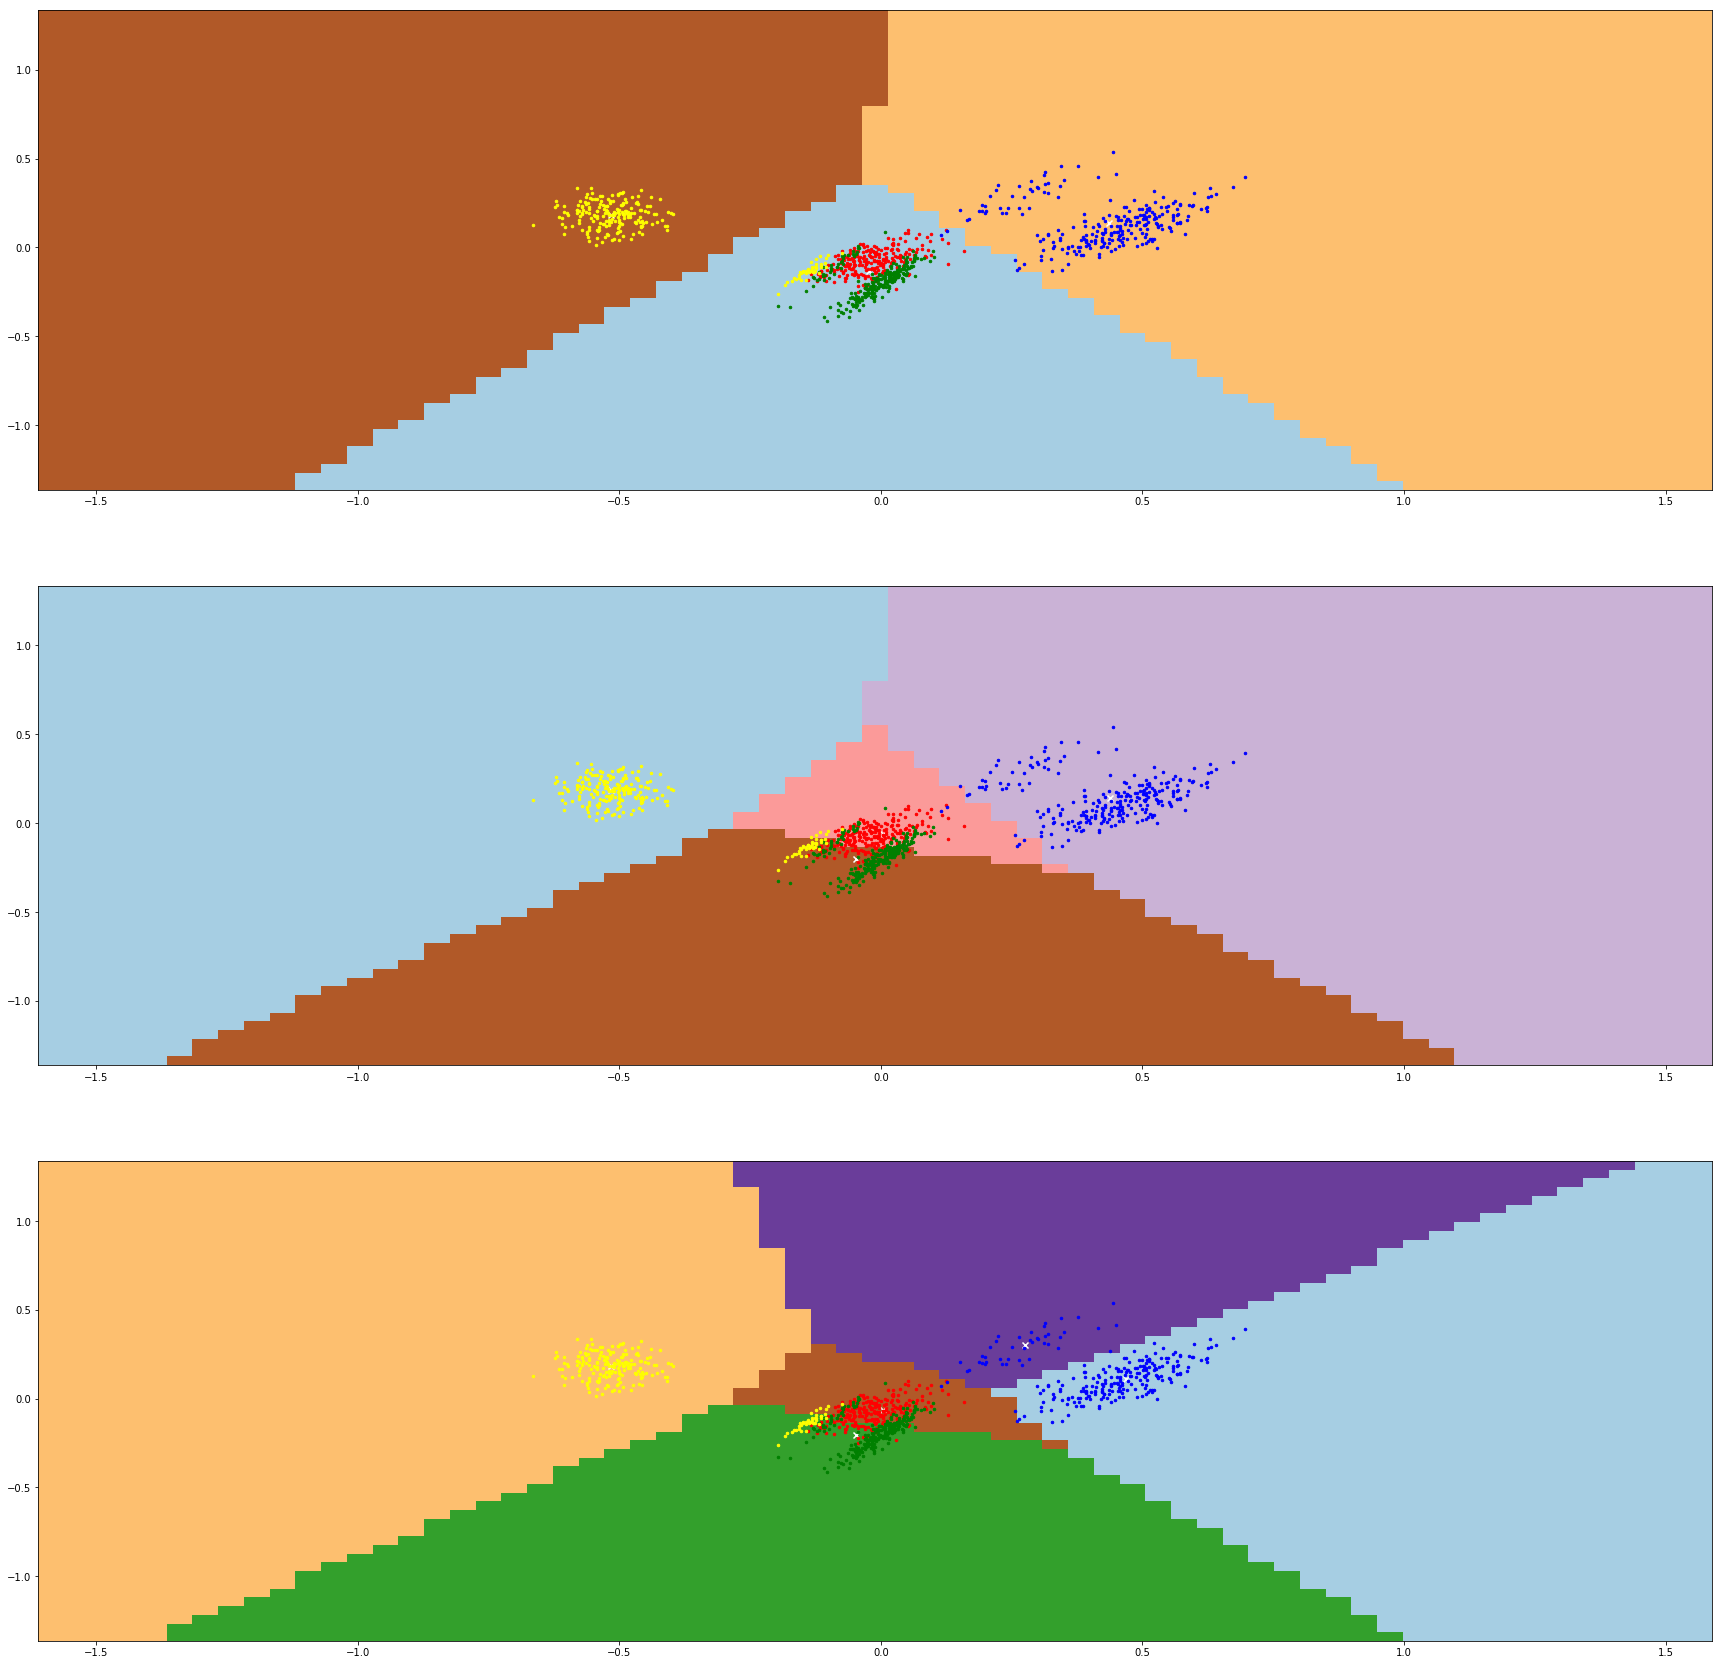

In [73]:
from sklearn.cluster import KMeans
from utils import plot_clusters

fig, ax = plt.subplots(3, 1, figsize=(30, 30))

reduced_data = PCA(n_components=2).fit_transform(X)
for n_clusters in range(3, 6):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++')
    kmeans.fit(reduced_data)
    plot_clusters(reduced_data, kmeans, ax[n_clusters-3], y)